In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('./ushape.csv', header=None)
df.columns = ['X', 'Y', 'class']

In [59]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


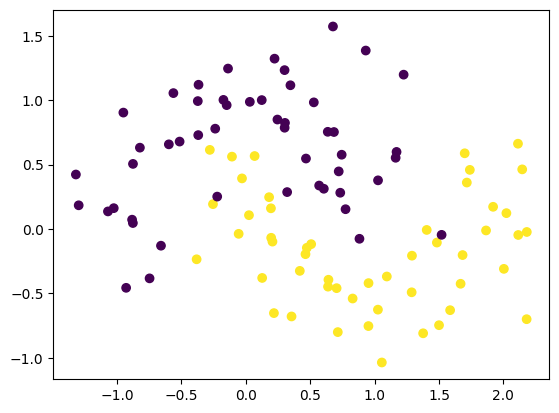

In [60]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [61]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [62]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [63]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Set parameters to 0
model.get_weights()

[array([[ 0.4131189 , -0.26006225, -0.584346  ,  0.5983209 ,  0.5805538 ,
         -0.16745162,  0.5077084 ,  0.28824311, -0.5450152 , -0.36923623],
        [-0.6859322 ,  0.09482247, -0.26484337,  0.17807245,  0.36869603,
          0.60826427,  0.54815596, -0.53869945, -0.7039208 ,  0.49092036]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.29288876,  0.20220584,  0.47410166,  0.11087441, -0.14710209,
         -0.12691173, -0.3698074 , -0.22885388,  0.02573663, -0.24685338],
        [-0.27480596,  0.39237285, -0.21139228, -0.03232831, -0.10485098,
          0.399823  , -0.03897911,  0.30879456,  0.35952127,  0.13141543],
        [-0.43021536,  0.29934984,  0.21278274,  0.2190845 , -0.0754464 ,
          0.38079172, -0.461766  ,  0.00865245,  0.48128927, -0.06440809],
        [ 0.2752024 ,  0.07974792,  0.1751334 , -0.4287619 ,  0.44574672,
          0.39592588,  0.365054  ,  0.24649632,  0.47638488, -0.09842309],
        [ 0.04272

In [65]:
initial_weights = model.get_weights()

In [66]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0], model.get_weights()[0].shape[1])*(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0], model.get_weights()[2].shape[1])*(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0], model.get_weights()[4].shape[1])*(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0], model.get_weights()[6].shape[1])*(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0], model.get_weights()[8].shape[1])*(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)


In [67]:
model.set_weights(initial_weights)

In [68]:
model.get_weights()

[array([[-0.6785247 , -0.04172528, -0.33953282, -0.32744935,  0.20429584,
          0.1910842 , -0.43593976, -0.85399854,  0.9709075 ,  0.7420951 ],
        [-0.07188268,  0.776139  ,  0.87751967, -0.09813222,  0.77478206,
          0.31916976,  0.30928323, -0.08387262, -0.29887307,  0.2964962 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.02130076,  0.21951309, -0.00128257,  0.11659329,  0.04860645,
         -0.10339975, -0.10729112,  0.02291382, -0.1393103 ,  0.09561887],
        [-0.06016899,  0.0099905 , -0.0064899 ,  0.02715559, -0.08093832,
          0.01900861,  0.00815168, -0.1405885 ,  0.04229291,  0.03946816],
        [-0.03274065,  0.16096821,  0.08890094, -0.15713969, -0.00383744,
         -0.11162718, -0.12226862,  0.05548274, -0.09704222,  0.00617149],
        [ 0.09458241, -0.07755071, -0.03947443,  0.03531907,  0.02144352,
         -0.11385074,  0.0137579 ,  0.08413124,  0.01639131, -0.0120392 ],
        [-0.00633

In [69]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.5070 - loss: 0.6932 - val_accuracy: 0.7000 - val_loss: 0.6929
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7383 - loss: 0.6926 - val_accuracy: 0.7500 - val_loss: 0.6921
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7680 - loss: 0.6918 - val_accuracy: 0.9000 - val_loss: 0.6912
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7727 - loss: 0.6912 - val_accuracy: 0.8500 - val_loss: 0.6902
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7984 - loss: 0.6904 - val_accuracy: 0.8500 - val_loss: 0.6889
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7922 - loss: 0.6894 - val_accuracy: 0.8500 - val_loss: 0.6874
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8086 - loss: 0.6884 - val_accuracy: 0.8500 - val_loss: 0.6855
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8078 - loss: 0.6866 - val_accuracy: 0.8500 - val_loss

In [71]:
model.get_weights() # see how much small the weights are

[array([[-0.56999904, -0.20269895, -0.4418497 , -0.29628518,  0.09986722,
          0.04544865, -0.44875005, -0.73385763,  0.7665289 ,  0.84406775],
        [ 0.08032695,  0.9260705 ,  1.0392015 , -0.02263225,  0.9259668 ,
          0.49581245,  0.50216573,  0.09740322, -0.5043844 ,  0.48444313]],
       dtype=float32),
 array([ 0.0218682 , -0.05017881,  0.02139273,  0.02302928, -0.08006473,
        -0.02410492,  0.08062402,  0.02306948, -0.08018857, -0.1184233 ],
       dtype=float32),
 array([[ 8.18483159e-03,  2.84374237e-01,  7.85911158e-02,
          7.19737411e-02, -1.45390891e-02, -3.47918570e-02,
         -1.63448572e-01, -3.46488059e-02, -7.55311698e-02,
          1.29520848e-01],
        [ 4.63082008e-02,  1.66337937e-01,  1.46584466e-01,
         -1.28995717e-01, -2.34379277e-01,  1.84364438e-01,
         -1.26878038e-01, -2.86041766e-01,  2.05254138e-01,
          1.87240571e-01],
        [ 7.73497149e-02,  3.23708326e-01,  2.55958825e-01,
         -3.14939559e-01, -1.63332

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

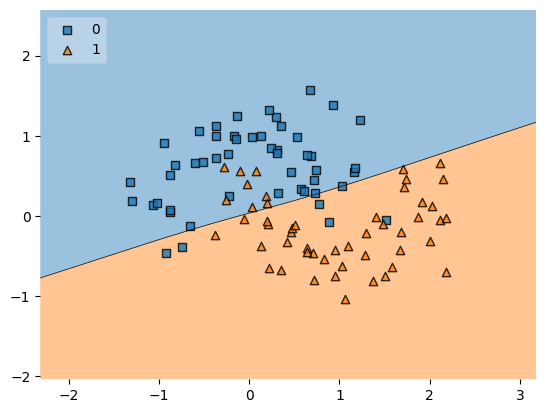

In [72]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [73]:
model2 = Sequential()

model2.add(Dense(10,activation='tanh',input_dim=2, kernel_initializer='glorot_uniform'))
model2.add(Dense(10,activation='tanh', kernel_initializer='glorot_uniform'))
model2.add(Dense(10,activation='tanh', kernel_initializer='glorot_uniform'))
model2.add(Dense(10,activation='tanh', kernel_initializer='glorot_uniform'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model2.get_weights()

[array([[-0.20243233,  0.45896024,  0.10937142, -0.3684798 , -0.29477692,
          0.2919802 , -0.15365022,  0.61900824,  0.41460818,  0.479721  ],
        [ 0.07017332,  0.68201286, -0.492451  ,  0.6591715 ,  0.61292404,
         -0.07381719,  0.552841  , -0.38341966, -0.15132624, -0.11703253]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.47652027, -0.07205635,  0.07638741,  0.16314954, -0.13336706,
         -0.1419563 ,  0.2231515 , -0.07615966, -0.31177467,  0.11358374],
        [ 0.17940259, -0.45139334, -0.04744315, -0.45640972,  0.37103426,
          0.21779549,  0.26717615, -0.0815303 ,  0.0903793 , -0.06216931],
        [-0.38262582, -0.46302998, -0.25240293, -0.38122815,  0.23902166,
         -0.32317287,  0.20288152, -0.08848017, -0.31352717, -0.27629882],
        [ 0.47550666,  0.40958494,  0.16898954, -0.1843453 ,  0.5263132 ,
          0.1441024 , -0.3041399 , -0.06286183, -0.28782654, -0.1211057 ],
        [-0.35725

In [75]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [76]:
history2 = model2.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.8461 - loss: 0.6356 - val_accuracy: 0.8500 - val_loss: 0.5942
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8070 - loss: 0.6130 - val_accuracy: 0.8500 - val_loss: 0.5637
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8680 - loss: 0.5818 - val_accuracy: 0.8500 - val_loss: 0.5352
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8562 - loss: 0.5650 - val_accuracy: 0.8500 - val_loss: 0.5093
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8719 - loss: 0.5421 - val_accuracy: 0.8500 - val_loss: 0.4853
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8211 - loss: 0.5278 - val_accuracy: 0.8500 - val_loss: 0.4638
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8211 - loss: 0.5122 - val_accuracy: 0.8500 - val_loss: 0.4433
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8445 - loss: 0.4969 - val_accuracy: 0.8500 - val_loss

In [77]:
model2.get_weights()

[array([[-0.12286434,  0.45889068,  0.08960401, -0.37436423, -0.31596854,
          0.22296706, -0.22102123,  0.728103  ,  0.3809402 ,  0.5717171 ],
        [ 0.20262164,  0.7057053 , -0.48080683,  0.6813294 ,  0.6644806 ,
         -0.09151168,  0.55557287, -0.34240454, -0.21587202, -0.06445976]],
       dtype=float32),
 array([ 0.14132988, -0.09582227,  0.12445052, -0.02125036,  0.03465224,
        -0.12618746, -0.00186855, -0.02001297, -0.01319652, -0.04178233],
       dtype=float32),
 array([[-4.50448126e-01, -1.37446493e-01,  1.28270105e-01,
          2.08464265e-01, -1.49935365e-01, -1.09898940e-01,
          1.85155675e-01, -9.59386770e-03, -3.77707869e-01,
          6.86825663e-02],
        [ 2.08831087e-01, -4.97924447e-01, -2.12356504e-02,
         -3.59661222e-01,  3.05301428e-01,  2.67353326e-01,
          2.53707469e-01, -1.67398881e-02,  6.58917753e-03,
         -1.20897807e-01],
        [-4.31021363e-01, -4.03794467e-01, -2.82767206e-01,
         -4.45557088e-01,  3.13802

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

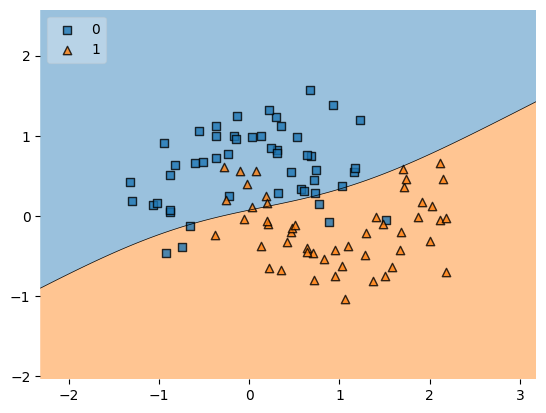

In [78]:

plot_decision_regions(X,y.astype('int'), clf=model2, legend=2) # wow star like!! 